In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


## Introduction

This project explores clinical variables associated with heart failure outcomes
using exploratory data analysis techniques. The goal is to identify patterns
between patient characteristics and mortality outcomes.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Data Overview

This data contains clinical measurments for heart failure patients. No missing values were observed. 



In [15]:
df.describe()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Visual Exploration




<Axes: xlabel='RestingBP', ylabel='Count'>

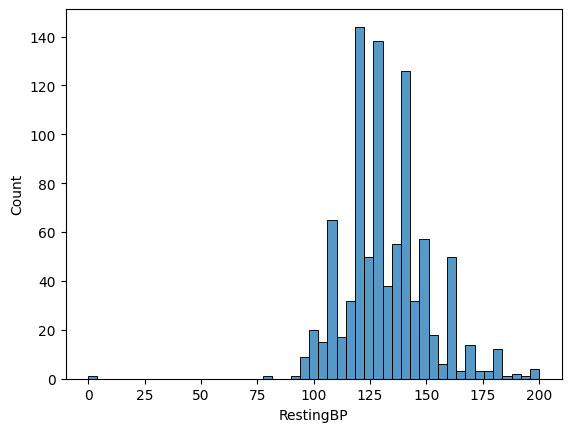

In [18]:
sns.histplot(df['Age'])
sns.histplot(df['ChestPainType'])
sns.histplot(df['RestingBP'])

## Target Variable: Heart Disease

The target variable 'HeartDisease' indicates whether the patient has heart disease (1) or not (0). Understanding how other clinical factors differ between the two different groups is critical in order to assess for risk.

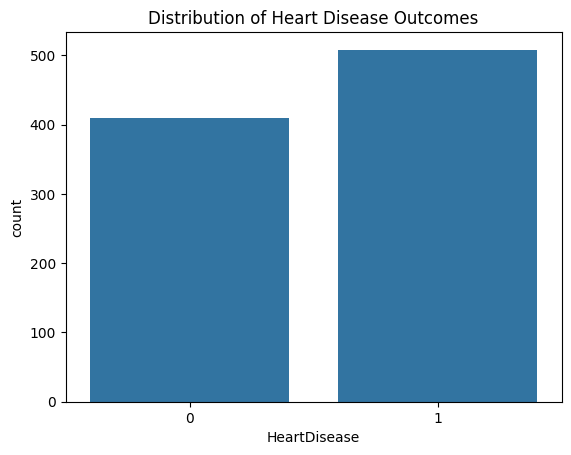

In [6]:
df['HeartDisease'].value_counts()
sns.countplot(data=df, x='HeartDisease')
plt.title('Distribution of Heart Disease Outcomes')
plt.show()

## Grouped Comparisons

Patients with heart disease tend to be older on average, suggesting age is a significant risk factor. Something to note is cholesterol levels is not an indicator of Heart Disease. Likely because individuals with Heart Disease are often already on choelsterol medications.

In [13]:
df.groupby('HeartDisease')['Age'].mean()
df.groupby('HeartDisease')['RestingBP'].mean()
df.groupby('HeartDisease')['Cholesterol'].mean()

HeartDisease
0    227.121951
1    175.940945
Name: Cholesterol, dtype: float64

## Categorical Variable Analysis

Asymptomatic chest pain is associated with a higher prevalence of heart disease, whereas typical angina appears to be more evenly distributed between patients with and without heart disease. Heart disease is more prevalent among male patients compared to female patients when proportions are considered. Additionally, exercise-induced angina is substantially more common among patients with heart disease.

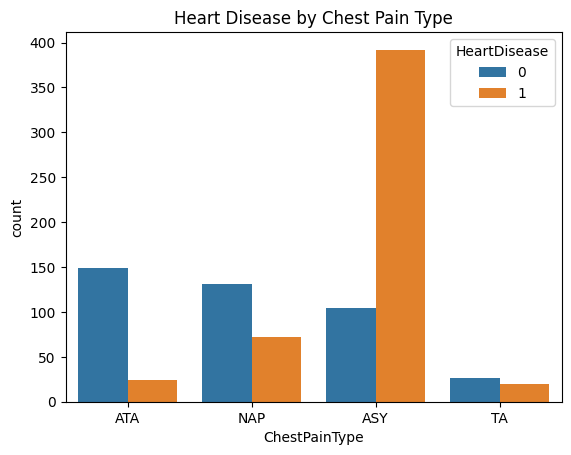

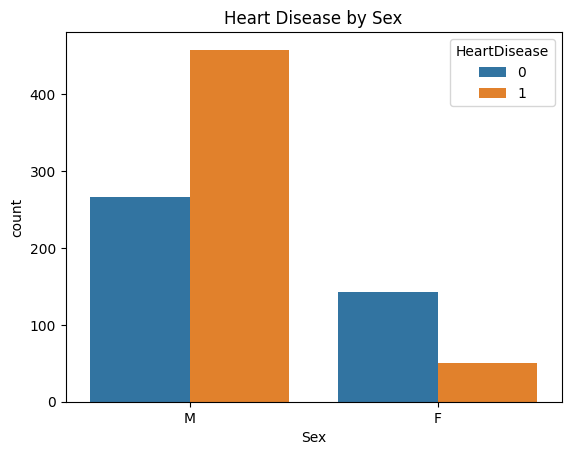

HeartDisease,0,1
ExerciseAngina,,
N,0.648995,0.351005
Y,0.148248,0.851752


In [22]:
pd.crosstab(df['ChestPainType'], df['HeartDisease'], normalize = 'index')
sns.countplot(data=df, x= 'ChestPainType', hue='HeartDisease')
plt.title('Heart Disease by Chest Pain Type')
plt.show()

pd.crosstab(df['Sex'], df['HeartDisease'], normalize = 'index')
sns.countplot(data=df, x='Sex', hue='HeartDisease')
plt.title('Heart Disease by Sex')
plt.show()

pd.crosstab(df['ExerciseAngina'], df['HeartDisease'], normalize = 'index')

## Correlation Analysis

The correlation analysis reveals several meaningful relationships with heart disease. Oldpeak shows the strongest positive correlation with heart disease, indicating that greater ST-segment depression during exercise is associated with increased disease prevalence. MaxHR is moderately negatively correlated with heart disease, suggesting that patients with lower maximum heart rates during exercise are more likely to have heart disease. Age also exhibits a positive association with heart disease and a negative association with MaxHR, reflecting known trends.

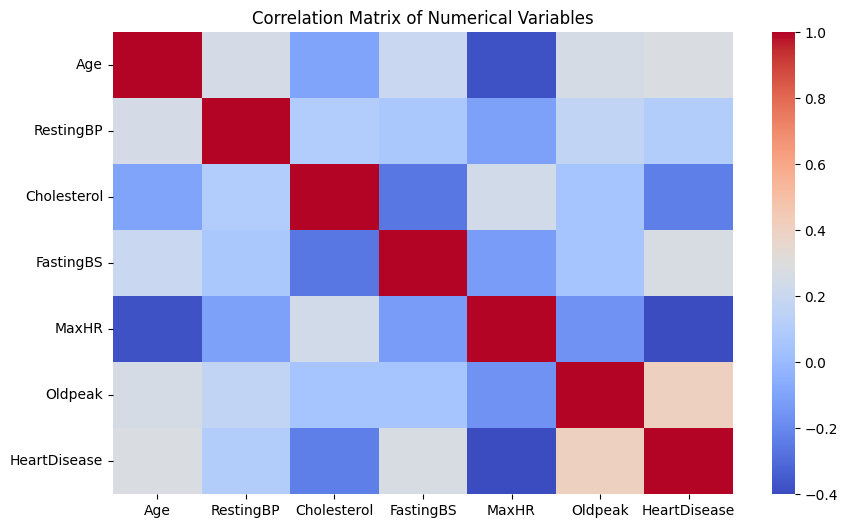

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

## Feature Engineering and Preprocessing

Categorical variables were encoded to prepare the data for classification modeling.

In [9]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144,193,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130,236,0,174,0.0,1,False,True,False,False,False,False,False,True,False


## Baseline Classification Model

A baseline logistic regression model was trained to predict the presence of heart disease.
The dataset was randomly split into training and testing subsets to evaluate model performance
on observations not used during training.



In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separate predictors and response
X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Fit logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions on test set
y_pred = model.predict(X_test)

# Model evaluation
accuracy_score(y_test, y_pred)


0.8826086956521739

## Conclusion

Exploratory analysis revealed that age, exercise-induced angina, ST depression (Oldpeak),
and maximum heart rate are strongly associated with heart disease.
A baseline logistic regression model demonstrated reasonable predictive performance,
suggesting that these clinical variables are informative for risk assessment.
